<a href="https://colab.research.google.com/github/pedrosena138/if1007-tasi4/blob/main/Analise_de_casos_de_febre_amarela_em_humanos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analise de casos de febre amarela em humanos nos estados brasileiros

## Bibliotecas

In [330]:
! pip install basedosdados

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [331]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import basedosdados as bd
%matplotlib inline

params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}

plt.rcParams.update(params)
plt.style.use('seaborn')

## Descrição da Base

### Febre Amarela

| Coluna            | Descrição                                                     |
|-------------------|---------------------------------------------------------------|
| ID                | Identificador sequencial único                                |
| MACRORREG_LPI     | Sigla da macrorregião do local provável de infecção           |
| COD_UF_LPI        | Código IBGE da Unidade Federada do local provável de infecção |
| UF_LPI            | Sigla da Unidade Federada do local provável de infecção       |
| COD_MUN_LPI       | Código IBGE do município do local provável de infecção        |
| MUN_LPI           | Nome do município do local provável de infecção               |
| SEXO              | Sexo do indivíduo                                             |
| IDADE             | Idade do indivíduo                                            |
| DT_IS             | Data de início dos sintomas do indivíduo (dd/mm/aaaa)         |
| SE_IS             | Semana epidemiológica de início dos sintomas do indivíduo     |
| MES_IS            | Mês de início dos sintomas do indivíduo                       |
| ANO_IS            | Ano de início dos sintomas do indivíduo                       |
| MONITORAMENTO_IS  | Período de monitoramento de início dos sintomas do indivíduo¹ |
| OBITO             | Evolução para o óbito                                         |
| DT_OBITO          | Data do óbito (dd/mm/aaaa)                                    |

¹ o **período de monitoramento** corresponde à estratificação temporal dos dados em períodos
anuais com início em julho e término em junho. Cada período de monitoramento corresponde
a um intervalo de 12 meses, que inclui o segundo semestre de um ano e o primeiro semestre do
ano seguinte. Essa representação do componente temporal decorre do reconhecimento de um
período sazonal de transmissão, entre dezembro e maio, que concentra a maior parte dos
eventos registrados no país, e tem como intuito evitar a análise fragmentada dos processos de
transmissão, cujo pico de ocorrência se dá geralmente na transição entre os anos. O Ministério
da Saúde adota essa estratificação para fins de políticas de vigilância em saúde e análise
epidemiológica

Fonte: https://opendatasus.saude.gov.br/dataset/febre-amarela-em-humanos-e-primatas-nao-humanos

In [332]:
df_cases = pd.read_csv('https://s3.sa-east-1.amazonaws.com/ckan.saude.gov.br/Febre+Amarela/fa_casoshumanos_1994-2021.csv', sep=';', encoding='latin-1')

In [333]:
print(df_cases.info())
df_cases.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2758 entries, 0 to 2757
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                2758 non-null   int64  
 1   MACRORREG_LPI     2758 non-null   object 
 2   COD_UF_LPI        2758 non-null   int64  
 3   UF_LPI            2758 non-null   object 
 4   COD_MUN_LPI       2751 non-null   float64
 5   MUN_LPI           2752 non-null   object 
 6   SEXO              2757 non-null   object 
 7   IDADE             2756 non-null   object 
 8   DT_IS             2753 non-null   object 
 9   SE_IS             2742 non-null   float64
 10  MES_IS            2747 non-null   float64
 11  ANO_IS            2758 non-null   int64  
 12  MONITORAMENTO_IS  2758 non-null   object 
 13  OBITO             2758 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 301.8+ KB
None


,ID,MACRORREG_LPI,COD_UF_LPI,UF_LPI,COD_MUN_LPI,MUN_LPI,SEXO,IDADE,DT_IS,SE_IS,MES_IS,ANO_IS,MONITORAMENTO_IS,OBITO
0,1,N,14,RR,140005.0,Alto Alegre,M,NaN,29/11/1994,48.0,11.0,1994,1994/1995,SIM
1,2,N,14,RR,140045.0,Pacaraima,M,19,19/02/1995,8.0,2.0,1995,1994/1995,NÃO
2,3,NE,21,MA,210060.0,Amarante do Maranhão,M,32,01/04/1995,13.0,4.0,1995,1994/1995,IGN
3,4,NE,21,MA,210060.0,Amarante do Maranhão,M,33,03/04/1995,14.0,4.0,1995,1994/1995,SIM
4,5,N,15,PA,150270.0,Conceição do Araguaia,M,26,12/04/1995,15.0,4.0,1995,1994/1995,SIM


Em 2007 foi adicionado o SINAN (Sistema de Informação de Agravos de Notificação) como uma das fontes de dados para a base de febre amarela, por esse motivo iremos utilizar o período de 2007 até 2021 para analisar os dados

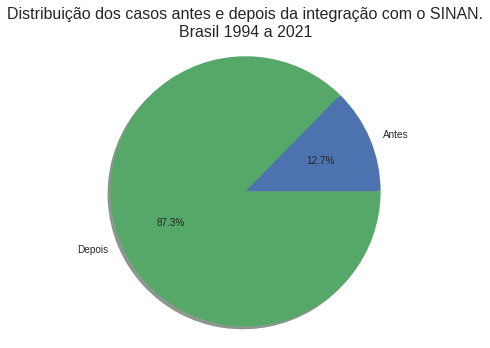

In [334]:
total = df_cases.shape[0]
values = df_cases.groupby(df_cases['ANO_IS'] >= 2007).size().values
labels = ['Antes', 'Depois']
plt.pie(values, labels=labels, autopct='%1.1f%%', shadow=True)
plt.axis('equal')
plt.title('Distribuição dos casos antes e depois da integração com o SINAN.\nBrasil 1994 a 2021', fontsize=16)
plt.show()

### Vacinas

Data de atualização dos dados: 04/09/2019

Os dados apresentados em 2013 se referem à soma dos seguintes dados:
- Até Junho de 2013: dados do API DOS
- A partir de Julho de 2013: APIWEB + SIPNI Web (exceção UFs: AC, CE, DF , GO , - MS, MT, PA, PR, RJ, SE, MA e TO por digitação duplicada)
- Base de dados do ano de 2013 foi encerrada em 23/03/2015.
- Doses aplicadas durante o MRC (pneumo 10 e meningo C) e Multivacinação

2014:
- Dados do ano de 2014 são parciais. Referem-se ao recebimento das informações do APIWEB + SIPNI até a data de 23/03/2015.

Fonte: http://tabnet.datasus.gov.br/cgi/tabcgi.exe?pni/cnv/cpniuf.def

In [335]:
df_vaccines = pd.read_csv('https://raw.githubusercontent.com/pedrosena138/if1007-tasi4/main/data/vacinas.csv', sep=';')

df_vaccines.info()
df_vaccines.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ANO                  26 non-null     int64  
 1   QTD_VACINAS          26 non-null     int64  
 2   COBERTURAS_VACINAIS  26 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 752.0 bytes


,ANO,QTD_VACINAS,COBERTURAS_VACINAIS
0,1994,86149,5.27
1,1995,144732,4.81
2,1996,176228,5.65
3,1997,248265,7.84
4,1998,591149,18.49


### IBGE

In [336]:
df_ibge = bd.read_table(
    dataset_id='br_ibge_populacao',
    table_id='municipio',
    billing_project_id="onyx-authority-273516"
)

df_ibge.info()
df_ibge.head()

Downloading: 100%|██████████| 168818/168818 [00:08<00:00, 18921.53rows/s]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168818 entries, 0 to 168817
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ano           168818 non-null  Int64 
 1   sigla_uf      168818 non-null  object
 2   id_municipio  168818 non-null  object
 3   populacao     168284 non-null  Int64 
dtypes: Int64(2), object(2)
memory usage: 5.5+ MB


,ano,sigla_uf,id_municipio,populacao
0,1991,RO,1100015,31981
1,1992,RO,1100015,34768
2,1993,RO,1100015,37036
3,1994,RO,1100015,39325
4,1995,RO,1100015,41574


## Tratamento de Dados

In [337]:
def converte_age_type(elm):
    try:
        e = elm.replace(',', '.')
        return e
    except AttributeError as e:
        pass

def normalize_population(row, col=None):
    cases = 0
    if not col:
        cases = row['SIM'] + row['NAO'] + row['IGN']
    if col == 'IGN':
        cases = row['IGN']
    elif col == 'SIM':
        cases = row['SIM']
    elif col == 'NAO':
        cases = row['NAO']
    return cases / row['POPULACAO']

def lethality_rate(row):
    cases = row['SIM'] + row['NAO']
    result = (row['SIM'] / cases) * 100
    return round(result, 2)

df_cases['IDADE'] = df_cases['IDADE'].apply(converte_age_type).astype('float32')
df_cases.rename(columns={'ANO_IS': 'ANO'}, inplace=True)
df_cases['ANO'] = df_cases['ANO'].astype('int64')

df_ibge.rename(columns={'ano': 'ANO', 'populacao': 'POPULACAO'}, inplace=True)
df_ibge['ANO'] = df_ibge['ANO'].astype('int64')

df_norm = pd.merge(
    df_cases.groupby(['ANO', 'OBITO']).size().unstack().reset_index().fillna(0).rename(columns={'NÃO': 'NAO'}), 
    df_ibge.query('ANO >= 1994').groupby('ANO')['POPULACAO'].sum().reset_index(name='POPULACAO'),
    how='left', 
    on='ANO'
)

df_norm['NORM'] = df_norm.apply(lambda x: normalize_population(x), axis=1)
df_norm['IGN_NORM'] = df_norm.apply(lambda x: normalize_population(x, col='IGN'), axis=1)
df_norm['SIM_NORM'] = df_norm.apply(lambda x: normalize_population(x, col='SIM'), axis=1)
df_norm['NAO_NORM'] = df_norm.apply(lambda x: normalize_population(x, col='NAO'), axis=1)
df_norm['LETHA'] = df_norm.apply(lambda x: lethality_rate(x), axis=1)

## Análise dos Dados

### Distribuição segundo o tempo

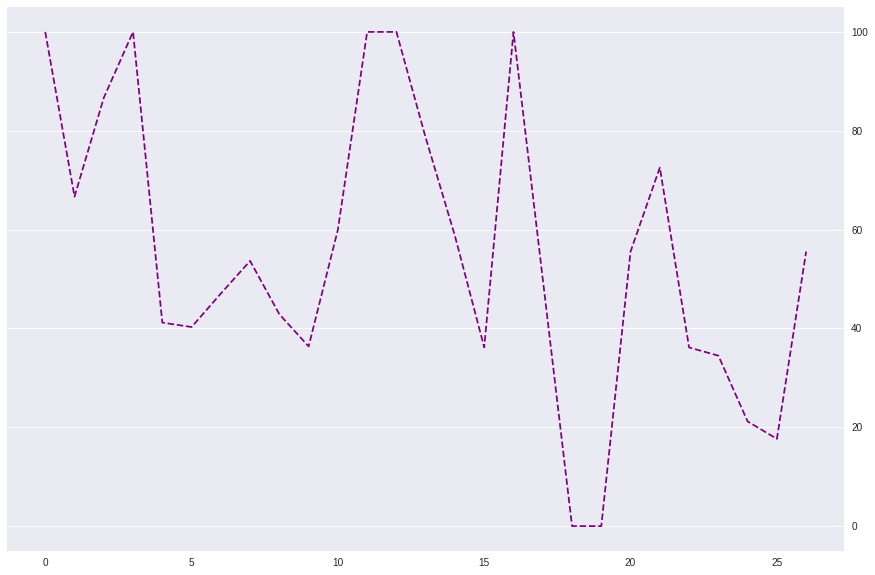

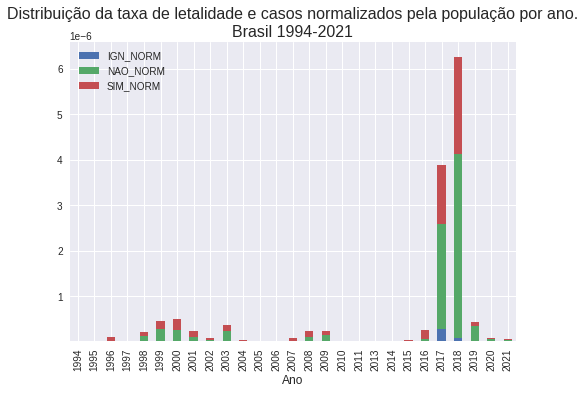

In [338]:
years = df_norm['ANO'].values
fig = plt.figure()
r = np.arange(len(years))

ax=plt.gca()


df_norm[['IGN_NORM', 'NAO_NORM', 'SIM_NORM']].plot(label=['Ign', 'Cura', 'Óbito'], kind='bar', stacked=True)
df_norm['LETHA'].plot(color='purple', secondary_y=True, linestyle='dashed', ax=ax)

plt.xlabel('Ano', fontsize=12)
plt.xticks(r, years)

plt.title('Distribuição da taxa de letalidade e casos normalizados pela população por ano.\nBrasil 1994-2021', fontsize=16)
fig.set_figwidth(15)

fig.set_figheight(10)

plt.show()

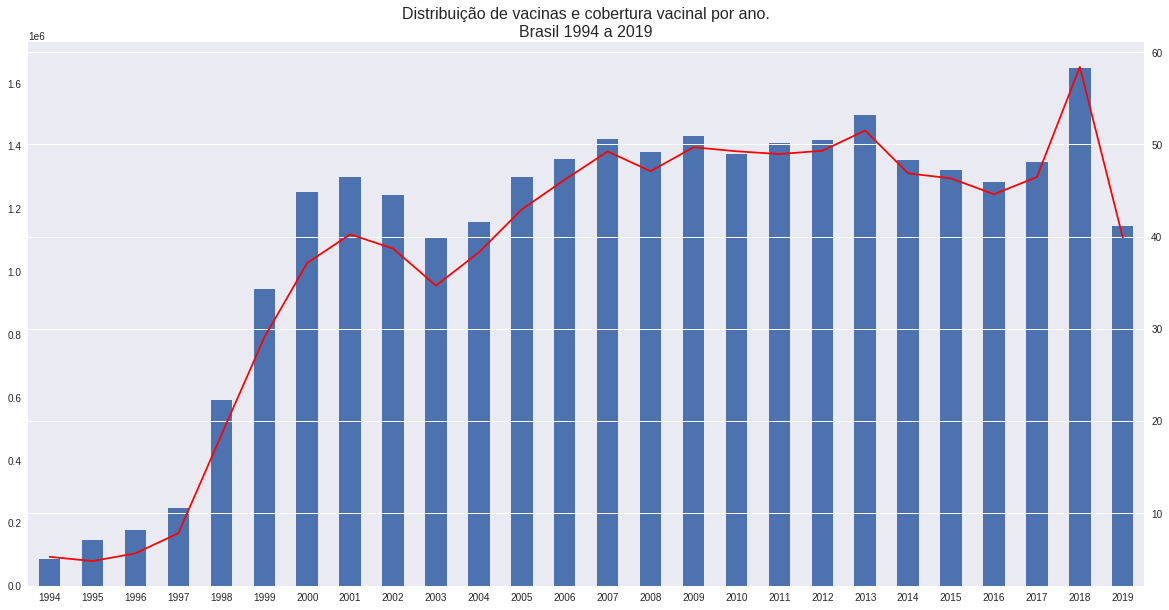

In [339]:
years = df_vaccines['ANO'].unique()
r = np.arange(len(years))
ax = plt.gca()
# fig = plt.figure()

df_vaccines['QTD_VACINAS'].plot(kind='bar', label='Vacinas', ax=ax)
df_vaccines['COBERTURAS_VACINAIS'].plot(color='red', label='Cobertura vacinal', secondary_y=True, ax=ax, figsize=(20,10))

plt.xlabel('Ano', fontsize=12)
plt.xticks(r, years)
plt.title('Distribuição de vacinas e cobertura vacinal por ano.\nBrasil 1994 a 2019', fontsize=16)

plt.show()

### Distribuição segundo o espaço

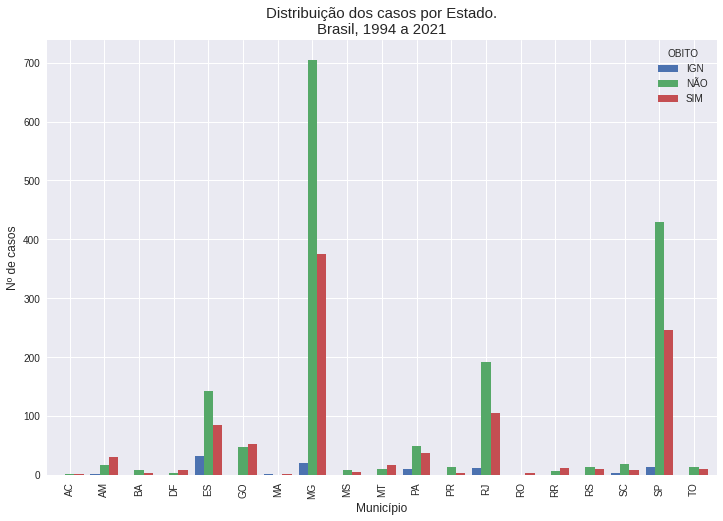

In [340]:
uf = df_cases.groupby(['UF_LPI', 'OBITO']).size().unstack().plot(kind='bar', figsize=(12, 8), width=.8)
plt.title('Distribuição dos casos por Estado.\nBrasil, 1994 a 2021', fontsize=15)
plt.ylabel('Nº de casos', fontsize=12)
plt.xlabel('Município', fontsize=12)
plt.show()

### Distribuição segundo pessoas

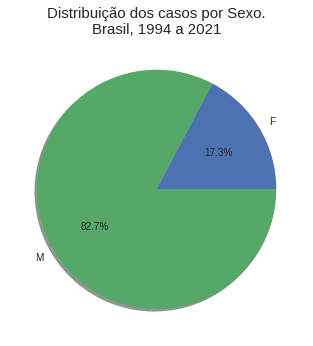

In [341]:
df_cases.groupby('SEXO').size().plot(kind='pie', autopct='%1.1f%%', shadow=True)
plt.title('Distribuição dos casos por Sexo.\nBrasil, 1994 a 2021', fontsize=15)
plt.ylabel('')
plt.show()

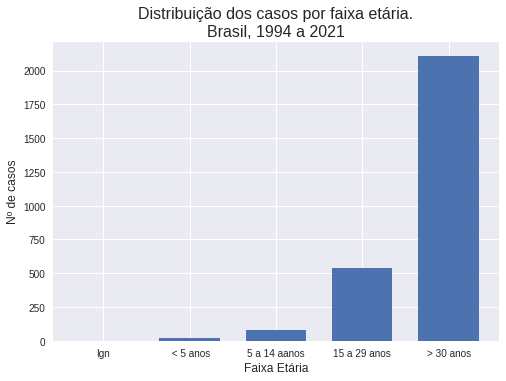

In [342]:
def get_age_groups():
    groups = {
        'age_null': len(np.where(df_cases['IDADE'].isnull())),
        'age_5': df_cases.query('IDADE < 5').shape[0],
        'age_5_to_14': df_cases.query('IDADE >= 5 & IDADE <= 14').shape[0],
        'age_15_to_29': df_cases.query('IDADE >= 15 & IDADE <= 29').shape[0],
        'age_30': df_cases.query('IDADE >= 30').shape[0],
    }

    return groups

age_groups = get_age_groups()
values = age_groups.values()

r = np.arange(len(values))
X = ['Ign', ' < 5 anos', '5 a 14 aanos', '15 a 29 anos', '> 30 anos']

plt.bar(r, values,  width=0.7)
plt.xlabel('Faixa Etária', fontsize=12)
plt.ylabel('Nº de casos', fontsize=12)
plt.title("Distribuição dos casos por faixa etária.\nBrasil, 1994 a 2021", fontsize=16)
plt.xticks(r, X)

plt.show()

In [33]:

# plt.show()

ano
1991    146815815
1992    149236984
1993    151571727
1994    153725670
1995    155822440
1996    157070163
1997    159636413
1998    161790311
1999    163947554
2000    169872854
2001    172385826
2002    174632960
2003    176871437
2004    181581024
2005    184184264
2006    186770562
2007    184014516
2008    189612814
2009    191446848
2010    190755799
2011    192379287
2012    193946886
2013    201032714
2014    202768562
2015    204450049
2016    206081432
2017    207660929
2018    208494900
2019    210147125
2020    211755692
2021    213317639
Name: populacao, dtype: Int64